# VAE Training

## imports

In [1]:
import os
from keras.utils import plot_model
from images.Metrics import calculate_metrics
from images.Utils import choose_random_files
import numpy as np

from model.VariationalAutoencoder import VariationalAutoencoder

from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array, array_to_img

from PIL import Image
from PIL.ImageShow import show



import matplotlib.pyplot as plt


import pandas as pd

Using TensorFlow backend.


# environment variables

In [2]:
MODEL_FOLDER_A = os.environ.get('HOME') + '/modelA/weights'
MODEL_FOLDER_B = os.environ.get('HOME') + '/modelB/weights'
MODEL_FOLDER_C = os.environ.get('HOME') + '/modelC/weights'

FILE_MODEL = 'weights.h5'
DATA_FOLDER = '/Volumes/My Passport/PFM/output/training_png'
RUN_FOLDER =  '/Volumes/My Passport/PFM/run/'

# VAE

## model variables

In [4]:
vaeA = VariationalAutoencoder(image_folder=DATA_FOLDER, run_folder=RUN_FOLDER, train_mode= False, z_dim=75, use_dropout=True, use_batch_norm=True)
vaeB = VariationalAutoencoder(image_folder=DATA_FOLDER, run_folder=RUN_FOLDER, train_mode= False, z_dim=150, use_dropout=True, use_batch_norm=True)
vaeC = VariationalAutoencoder(image_folder=DATA_FOLDER, run_folder=RUN_FOLDER, train_mode= False, z_dim=300, use_dropout=True, use_batch_norm=True)

vaeA.model.load_weights(os.path.join(MODEL_FOLDER_A, 'weights.h5'))  
vaeB.model.load_weights(os.path.join(MODEL_FOLDER_B, 'weights.h5'))  
vaeC.model.load_weights(os.path.join(MODEL_FOLDER_C, 'weights.h5'))  

##Image generation

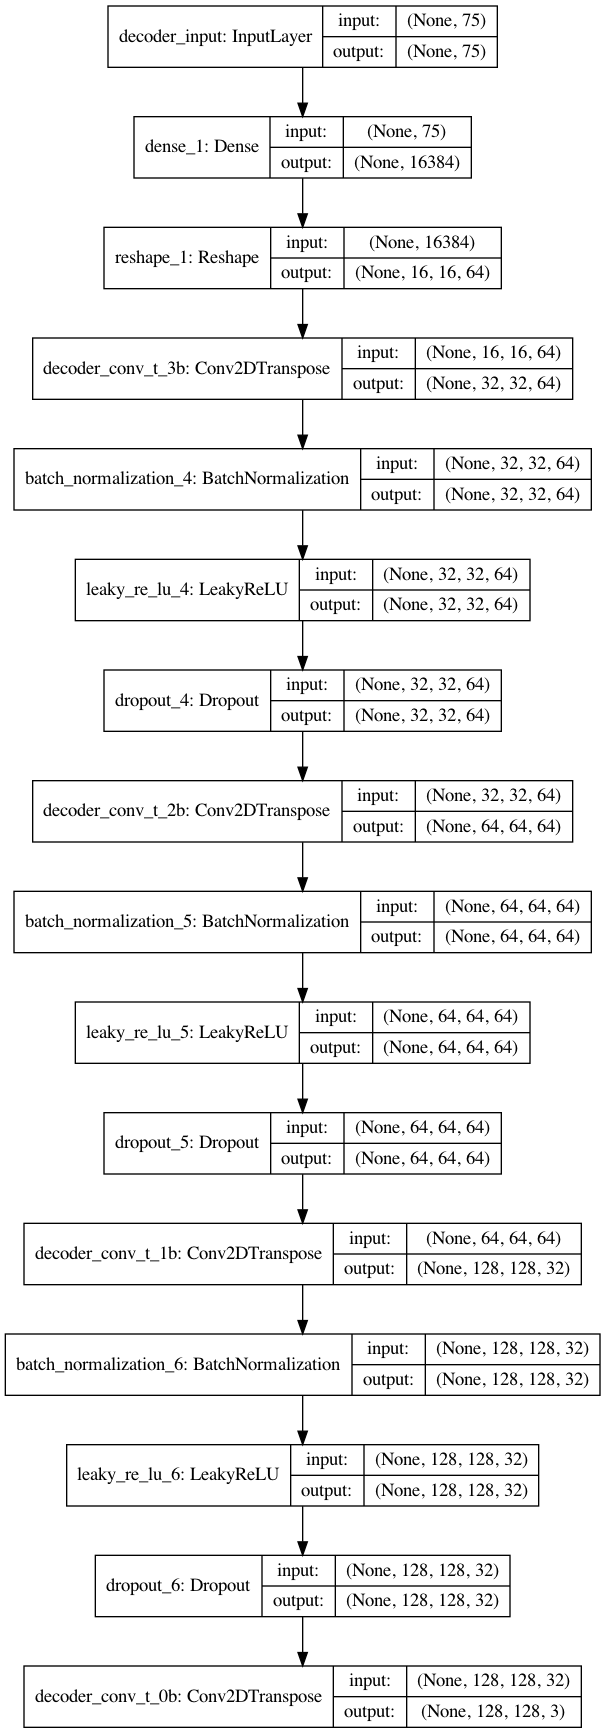

In [6]:
#plot_model(vaeA.decoder, to_file='model_plot_decoder_75.png', show_shapes=True, show_layer_names=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


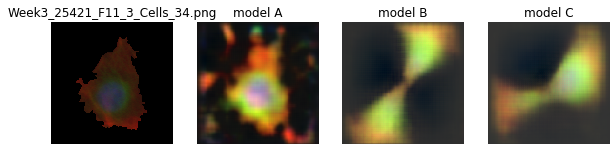

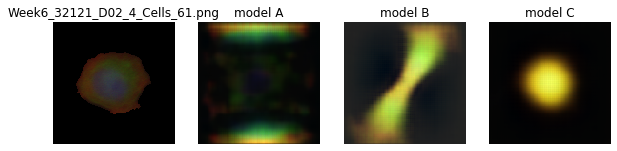

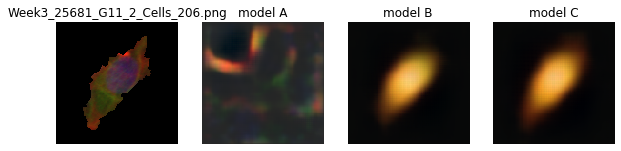

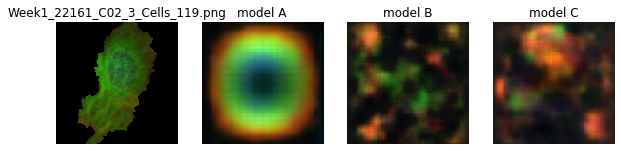

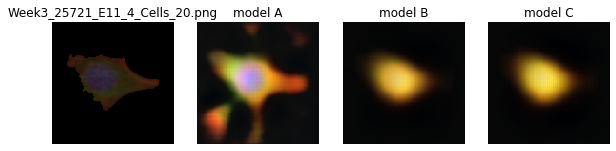

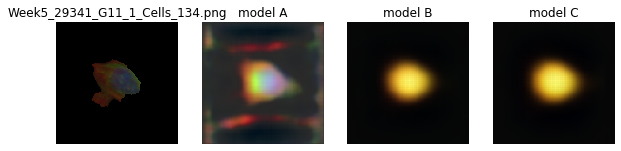

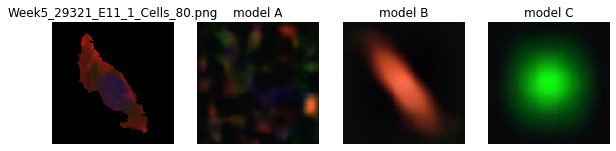

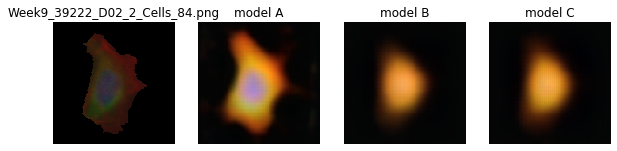

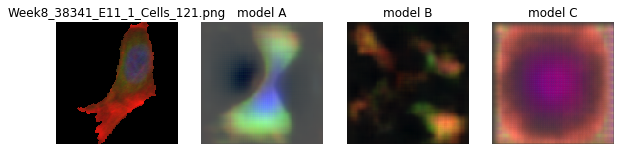

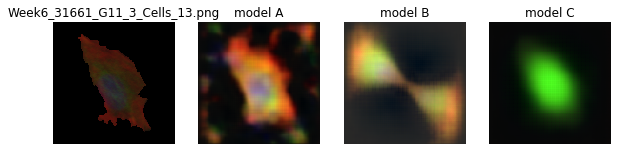

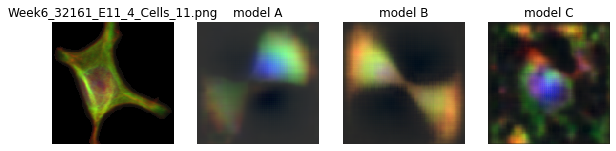

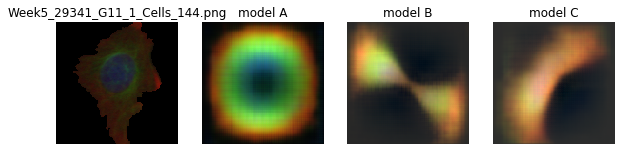

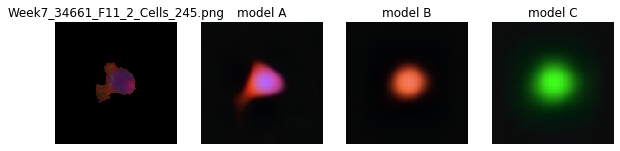

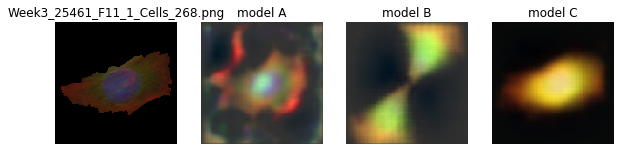

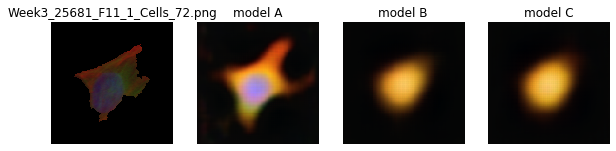

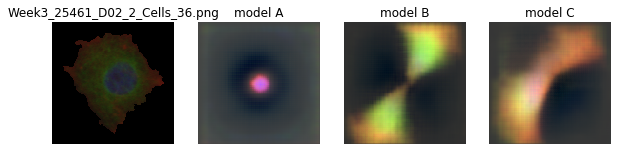

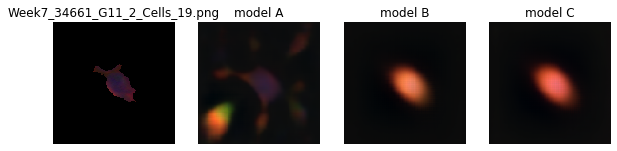

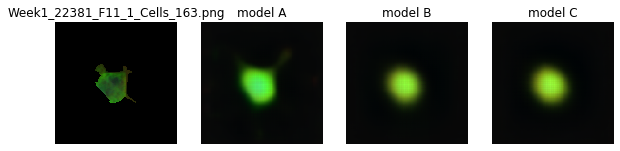

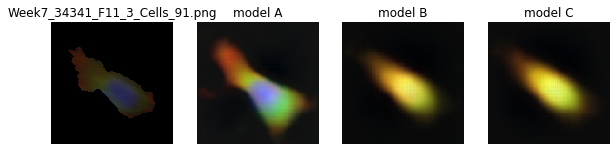

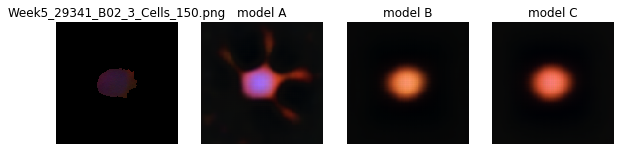

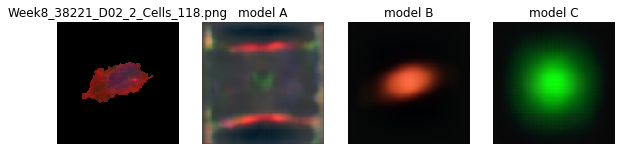

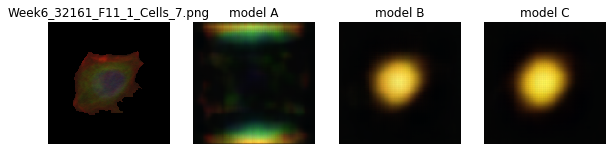

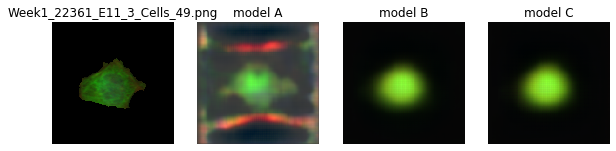

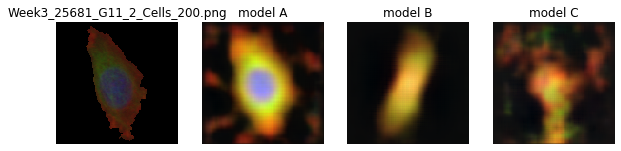

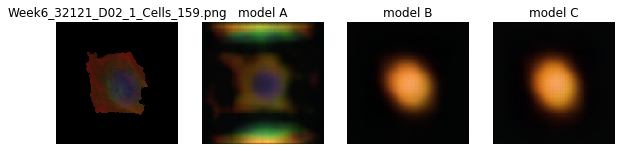

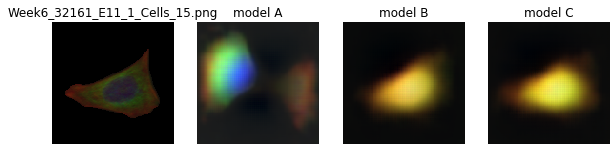

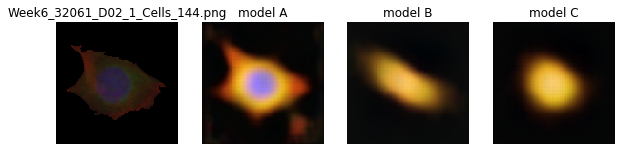

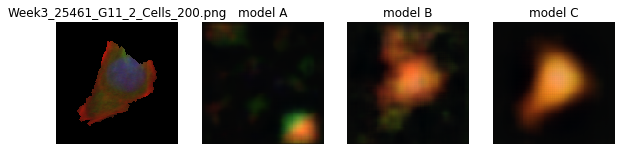

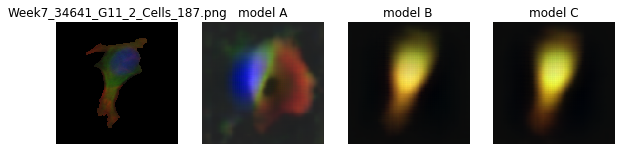

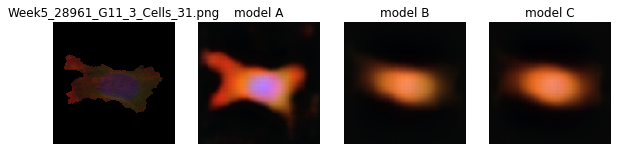

In [4]:
titles = []
i = []
z_vectors = []
result = []
IMAGES_2_GENERATE = 30 

def get_z_value(vae, img):
    array_img = img_to_array(img)  # keras
    array_img = np.expand_dims(array_img, axis=0)
    z_result = vae.encoder.predict(array_img)
    return z_result

def predictImage(vae, img):
    z_result = get_z_value(vae, img)
    z_vectors.append(z_result)
    reco = vae.decoder.predict(z_result).squeeze()
    outimg = array_to_img(reco, scale=True)
    return outimg

images = choose_random_files(DATA_FOLDER, IMAGES_2_GENERATE)

for image in images:
    image_path = os.sep.join([DATA_FOLDER, image])
    img = Image.open(image_path)
    for t in [image, "model A", "model B", "model C"]:
        titles.append(t)
    for img in [img, predictImage(vaeA, img), predictImage(vaeB, img), predictImage(vaeC, img)]:
        i.append(img)

#https://stackoverflow.com/questions/36006136/how-to-display-images-in-a-row-with-ipython-display
def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(10,10)):
    t = 1

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
        t += 1
        if column%4 == 0:
            plt.savefig('/Users/jmunozal/temp/cells_' + str(t) + '.png')
   

grid_display(i, titles, 4, (10,3))

#vaeA.decoder.summary()
#vaeB.decoder.summary()
#vaeC.decoder.summary()



In [8]:
## Show model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

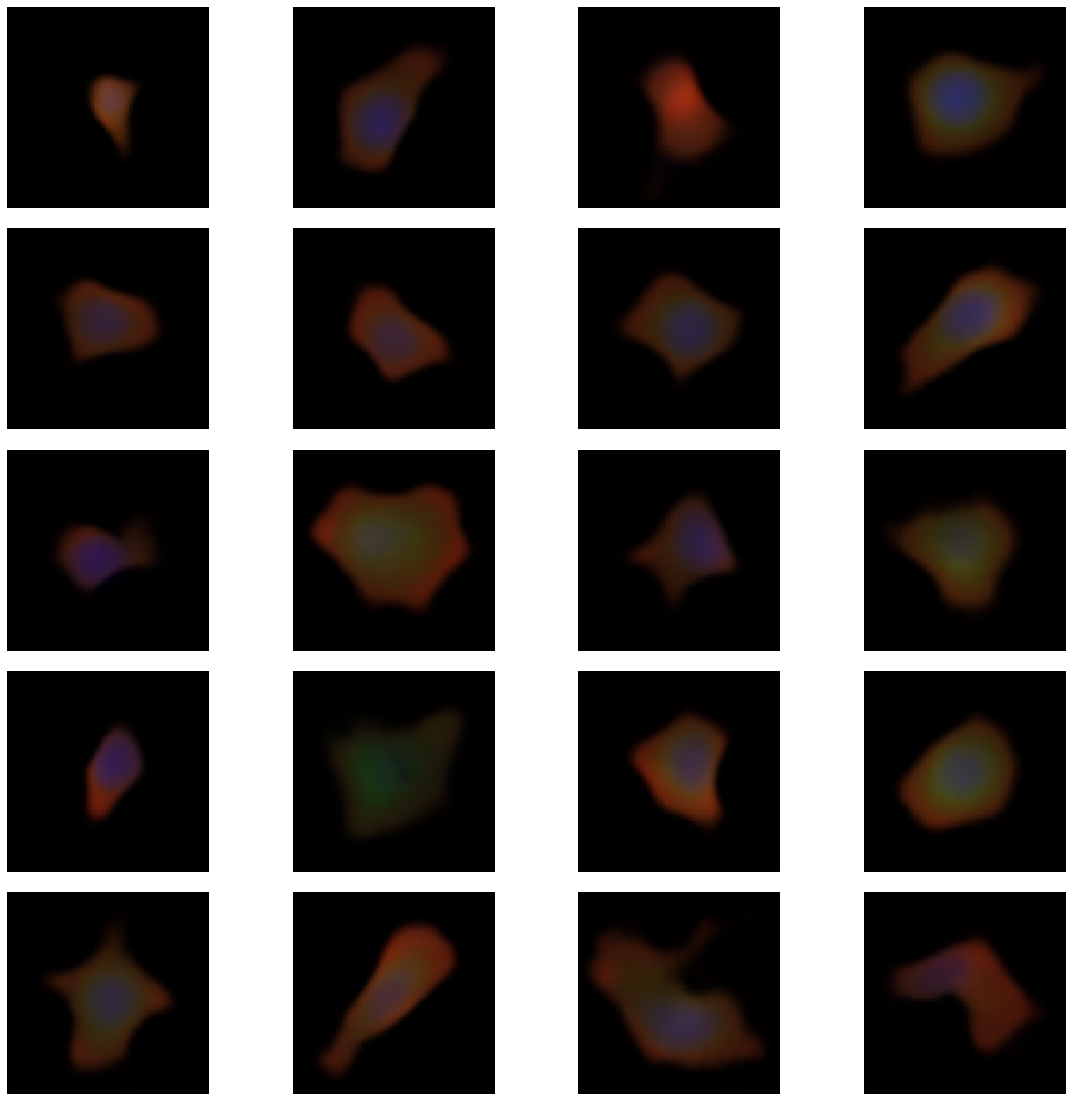

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [15]:
fig = plt.figure(figsize=(40,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
#generate random numbers from normal multivariate (0,1)
n_to_show = 20
znew  = np.random.normal(size=(n_to_show, vaeA.z_dim))
reconst = vaeA.decoder.predict(np.array(znew))
for i in range(n_to_show):
    fig.set_figheight(20)
    fig.set_figwidth(20)
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(reconst[i, :,:,:])
    ax.axis('off')

plt.savefig('generated.png')
plt.show()


## Metrics 

In [ ]:
calculate_metrics(vae = vaeC, path = DATA_FOLDER)

## Latent space distribution

In [ ]:
from scipy.stats import norm

N_IMAGES = 5000
N_DIMS = 20

images = choose_random_files(DATA_FOLDER, N_IMAGES)

v = np.empty([N_DIMS, N_IMAGES])

for i in range(N_IMAGES):
    image = images[i]
    src = os.sep.join([DATA_FOLDER, image])
    image = predictImage(vaeB, Image.open(src))
    z_val = get_z_value(vaeB, image)
    #print(z_val)
    for d in range(N_DIMS):
        v[d, i] = z_val[0][d]

# adapted from: https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid
def draw_histograms(df, variables, n_rows, n_cols):
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    fig=plt.figure()
    fig.set_size_inches(10.5, 15.5)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        q = df[var_name].quantile(0.68)
        #print(df[var_name].values)
        df[df[var_name] < q].hist(bins=30, ax=ax)
        #df[var_name].hist(bins=10,ax=ax)
        #ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    #plt.show()
    plt.savefig('z_variables.png')

def concat_if_len_1(string):
    if len(string) == 1:
        return '0' + string
    return string

dataframe = pd.DataFrame.from_records(v)
dataframe = dataframe.T
dataframe.columns = map(concat_if_len_1,map(str, range(N_DIMS)))

#print(dataframe)

draw_histograms(dataframe, dataframe.columns, 5, 4)